<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/05_17_PCA%2CLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH 6 차원 축소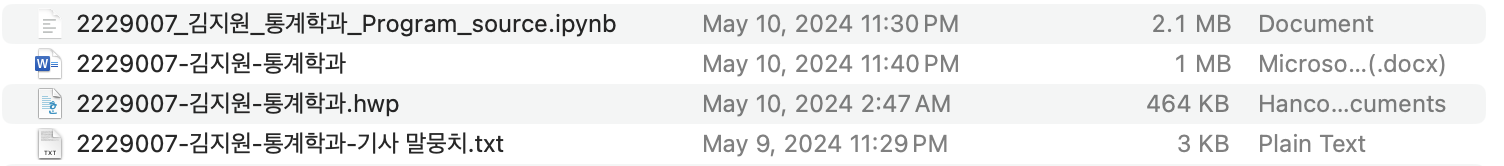

## 01 차원 축소(Demension Reduction) 개요
차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생
성하는 것이다.
매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다. 또, 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.

차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다.
* 피처(특성) 선택: 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
* 피처(특성) 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것, 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미한다.

차원 축소 알고리즘이 자주 사용되는 영역
1. 매우 많은 픽셀로 이뤄진 이미지 데이터: 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행 -> 과적합이 줄어 예측 성능 증가
2. 텍스트 문서의 숨겨진 의미 추출: 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하여 이를 찾아냄. ex. SVD, NMF

## 02 PCA(Principal Component Analysis)

### PCA 개요
PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법이다.

PCA는 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하여 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하며, 이것이 PCA의 주성분이 된다.

PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫번째 벡터 축을 생성하고,
두번째 죽은 이 벡터 축에 직각이 되는 벡터(직교벡터)를 축으로 함.
세번째 축은 다시 두번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함.
-> 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨.

PCA는 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법

PCA를 선형대수 관점에서 해석해보면, 입력 데이터의 공분산행렬(Covariance Matrix)을 고유값 분 해하고, 이 고유벡터에 입력 데이터를 선형변환 하는 방식이다.

PCA의 수행 순서
1. 입력 데이터 세트의 공분산 행렬을 생성합니다.
2. 공분산 행렬의 고유 벡터와 고유 값을 계산합니다.
3. 고유값이 가장 큰 순으로 K개(PCA변환차수만큼)만큼 고유벡터를 추출합니다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환합니다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = load_iris()
#넘파이 데이터 세트를 판다스 dataframe으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data,columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setora의 target 값은 0,versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel ('sepal width')
plt.show()

Setosa의 경우 sepal width가 3.0보다 크고, sepal length가 6.0이하인 곳에 일정하게 분포 돼 있다.

Versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려움.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [ ]:
##  4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA속성) PCA 데이터로 변환

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과transform()을 호출해 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca. transform(iris_scaled)
print(iris_pca.shape)

In [ ]:
# PCA 변환된 데이터의 칼럼명을 각각 pca.component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

In [ ]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^','s','o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt. scatter(x_axis_data, y_axis_data, marker=marker ,label=iris. target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA로 변환한 후에도 pca_component1축을 기반으로 Setosa품종은 명확하게 구분이 가능함.
Versicolor와 Virginica는pca_component_1축을 기반으로 서로겹치는 부분이 일부 존재하지만, 비교적 잘 구분됨.

In [ ]:
print(pca.explained_variance_ratio_)

explained_variance_ratio_는 전체 변동성에서 개별 PCA 컴포넌트 별 차지하는 변동성 비율을 제공함
pca_component_1이 전체 변동성의 약72.9%를 차지하며, 두번째인 pca_component_2가 약 22.8%를 차지함.

In [ ]:
## 원본 데이터에 랜던포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print ('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

In [ ]:
## 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트를 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:' , np.mean(scores_pca))

붓꽃 데이터의 경우, 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 10% 하락함.

-> 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본데이터의 특성을 상당 부분 유지하고 있음

In [ ]:
# header로 의미없는 첫 행 제거, iloc로 기존 id제거
import pandas as pd
df = pd.read_excel('/content/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

In [ ]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month': 'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분0.9 이상으로 매우 높음
이보다는 낮지만 PAY1 ~PAY6까지의 속성 상관도도 높음.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명: ',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_계산을 위해 fit()호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 9 5% 이상 설명할 수 있음. 특히, 첫번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

In [ ]:
## 원본 데이터세트에 랜덤포레스트 적용

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores =cross_val_score(rcf, X_features, y_target, scoring= 'accuracy', cv=3 )

print ('CV=3인 경우의 개별 Fold세트별 정확도: ',scores )
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

-> 3개의 교차 검증 세트에서 평균 예측 정확도 약 81.70%

In [ ]:
## 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해 예측

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring= 'accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: ' , scores_pca )
print('PCA 변환 데이터 세트 평균 정확도:{0:4f}'.format(np.mean(scores_pca)))

-> 전체 속성의 1/4정도만으로 원본 데이터 결과보다 약1~2%정도의 예측 성능 저하

## 03LDA(Linear Discriminant Analysis)

### LDA 개요

LDA(Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이다. 지도 학습의 분휴에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다는 점이 PCA와 가장 큰 차이이다.

PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 것.

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원 축소한다. 즉, 클래스간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다.


LDA를 구하는 스텝
1. 클래스 내부와 클래스 간 분산 행렬을 구합니다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별피처의 평균벡터(meanvector)를 기반으로 구한다.
2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 S라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.

3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출합니다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

### 붓꽃데이터 세트에 LDA 적용하기

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris =load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setora의 target 값은 0,versicolor는 1, virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()